# **Predict Customer Clicked Ads Classification**
---

# Import Library

In [1]:
# Data manipulation
import numpy as np
import pandas as pd
import datetime as dt

# Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Read Data

In [3]:
# Read data
link = 'https://raw.githubusercontent.com/sabirinID/Predicting-Customer-Clicked-Ads-Classification/main/Dataset/clicked_ads_dataset.csv'
df = pd.read_csv(link, index_col=0)

In [4]:
df.sample(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
49,48.01,46,380002700.0,119.93,Perempuan,4/25/2016 11:01,Yes,Palembang,Sumatra Selatan,Furniture
322,86.78,30,384666940.0,170.13,Laki-Laki,2/18/2016 23:08,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
69,78.53,34,227758860.0,131.72,Perempuan,4/22/2016 20:10,Yes,Jakarta Selatan,Daerah Khusus Ibukota Jakarta,Fashion
745,57.99,50,437262700.0,124.58,Perempuan,2/12/2016 8:46,Yes,Bogor,Jawa Barat,Food
408,51.68,49,NaN,258.62,Perempuan,6/28/2016 12:51,Yes,Surabaya,Jawa Timur,Finance


# Data Understanding

## Features Definition

| Feature Name             | Feature Description                          |
|--------------------------|----------------------------------------------|
| Daily Time Spent on Site | Amount of time spent on the website per day  |
| Age                      | Age of the user                              |
| Area Income              | Income level of the user's area              |
| Daily Internet Usage     | Amount of time spent on the internet per day |
| Male                     | Gender of the user                           |
| Timestamp                | Time and date when the data was recorded     |
| Clicked on Ad            | Whether the user clicked on an ad            |
| city                     | City where the user is located               |
| province                 | Province where the user is located           |
| category                 | Category of the ad                           |


## Dimensions of the DataFrame

In [5]:
df.shape

(1000, 10)

In [6]:
print('Dataset ini memiliki dimensi data, yaitu')
print('Jumlah baris: {}'.format(df.shape[0]))
print('Jumlah kolom: {}'.format(df.shape[1]))

Dataset ini memiliki dimensi data, yaitu
Jumlah baris: 1000
Jumlah kolom: 10


## Data Types of the Features

In [7]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Male                      997 non-null    object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 85.9+ KB


🔎 Observasi
- Tipe data: float64, int64, dan object.
- Fitur `Daily Time Spent on Site`, `Area Income`, `Daily Internet Usage`, dan `Male` memiliki kurang dari 2.240 _non-null values_.
- Fitur `Timestamp` seharusnya memiliki tipe data datetime bukan object, sehingga harus diubah.
- Beberapa fitur perlu diubah penamaannya agar tidak menimbulkan ketidakjelasan atau ambiguitas. Penamaan fitur akan menggunakan kaidah penamaan `PascalCase` atau `UpperCamelCase`.

In [8]:
# Fix data type: object to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Rename features
features = {
    'Daily Time Spent on Site': 'DailyTimeSpent',
    'Area Income'             : 'Income',
    'Daily Internet Usage'    : 'DailyInternetUsage',
    'Male'                    : 'Gender',
    'Clicked on Ad'           : 'ClickedAd',
    'city'                    : 'City',
    'province'                : 'Province',
    'category'                : 'AdCategory'
}
df = df.rename(columns=features)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   DailyTimeSpent      987 non-null    float64       
 1   Age                 1000 non-null   int64         
 2   Income              987 non-null    float64       
 3   DailyInternetUsage  989 non-null    float64       
 4   Gender              997 non-null    object        
 5   Timestamp           1000 non-null   datetime64[ns]
 6   ClickedAd           1000 non-null   object        
 7   City                1000 non-null   object        
 8   Province            1000 non-null   object        
 9   AdCategory          1000 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 85.9+ KB


✅ Tipe data untuk setiap fitur dalam dataset sudah sesuai.

# Data Exploration

## Exploratory Data Analysis

### Statistical Analysis

In [10]:
# Statistics for the columns (features)
df.describe(include='all')

,DailyTimeSpent,Age,Income,DailyInternetUsage,Gender,Timestamp,ClickedAd,City,Province,AdCategory
count,987.000000,1000.000000,9.870000e+02,989.000000,997,1000,1000,1000,1000,1000
unique,NaN,NaN,NaN,NaN,2,NaN,2,30,16,10
top,NaN,NaN,NaN,NaN,Perempuan,NaN,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,NaN,NaN,NaN,NaN,518,NaN,500,64,253,112
mean,64.929524,36.009000,3.848647e+08,179.863620,NaN,2016-04-10 10:33:36.840000,NaN,NaN,NaN,NaN
min,32.600000,19.000000,9.797550e+07,104.780000,NaN,2016-01-01 02:52:00,NaN,NaN,NaN,NaN
25%,51.270000,29.000000,3.286330e+08,138.710000,NaN,2016-02-18 02:55:15,NaN,NaN,NaN,NaN
50%,68.110000,35.000000,3.990683e+08,182.650000,NaN,2016-04-07 17:27:00,NaN,NaN,NaN,NaN
75%,78.460000,42.000000,4.583554e+08,218.790000,NaN,2016-05-31 03:18:00,NaN,NaN,NaN,NaN
max,91.430000,61.000000,5.563936e+08,267.010000,NaN,2016-07-24 00:22:00,NaN,NaN,NaN,NaN


In [11]:
# Define features
num = df.select_dtypes(include=['float64', 'int64'])
cat = df.select_dtypes(include=['object'])

num_cols = num.columns
cat_cols = cat.columns

In [12]:
print(f'Jumlah fitur numerikal  : {num.shape[1]}')
print(f'Jumlah fitur kategorikal: {cat.shape[1]}')

Jumlah fitur numerikal  : 4
Jumlah fitur kategorikal: 5


### Univariate Analysis

#### Numerical Features

In [13]:
num.describe()

,DailyTimeSpent,Age,Income,DailyInternetUsage
count,987.000000,1000.000000,9.870000e+02,989.000000
mean,64.929524,36.009000,3.848647e+08,179.863620
std,15.844699,8.785562,9.407999e+07,43.870142
min,32.600000,19.000000,9.797550e+07,104.780000
25%,51.270000,29.000000,3.286330e+08,138.710000
50%,68.110000,35.000000,3.990683e+08,182.650000
75%,78.460000,42.000000,4.583554e+08,218.790000
max,91.430000,61.000000,5.563936e+08,267.010000


🔎 Observasi
- Sebagian besar pelanggan berusia 35 tahun.
- Mayoritas pelanggan memiliki `DailyTimeSpent` selama 65 menit per hari.
- Mayoritas pelanggan memiliki `Income` sebesar Rp399.068.320.
- Mayoritas pelanggan memiliki `DailyInternetUsage` sebanyak 180 MB (mega byte) per hari.

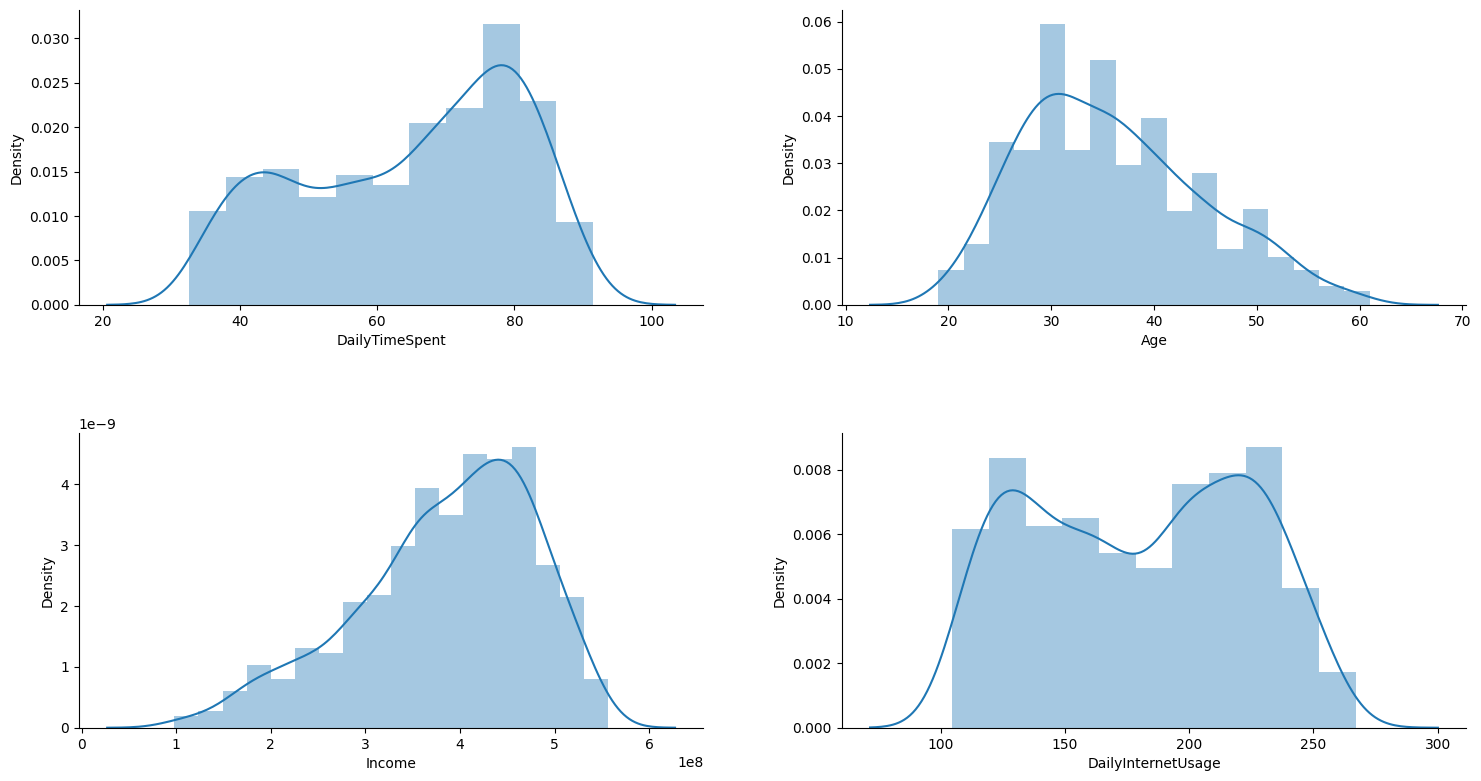

In [14]:
plt.figure(figsize=(16, 9))
for i in range(0, len(num_cols)):
    plt.subplot(2, 2, i+1)
    sns.distplot(df[num_cols[i]])
    sns.despine()
    plt.tight_layout(pad=5)

plt.show()

🔎 Insights
- Fitur `Age` memiliki distribusi yang cenderung _positively skewed_ atau menceng kanan, sedangkan `Income` memiliki distribusi yang cenderung _negatively skewed_ atau menceng kiri.
- Fitur `DailyTimeSpent` dan `DailyInternetUsage` memiliki distribusi yang cenderung normal.

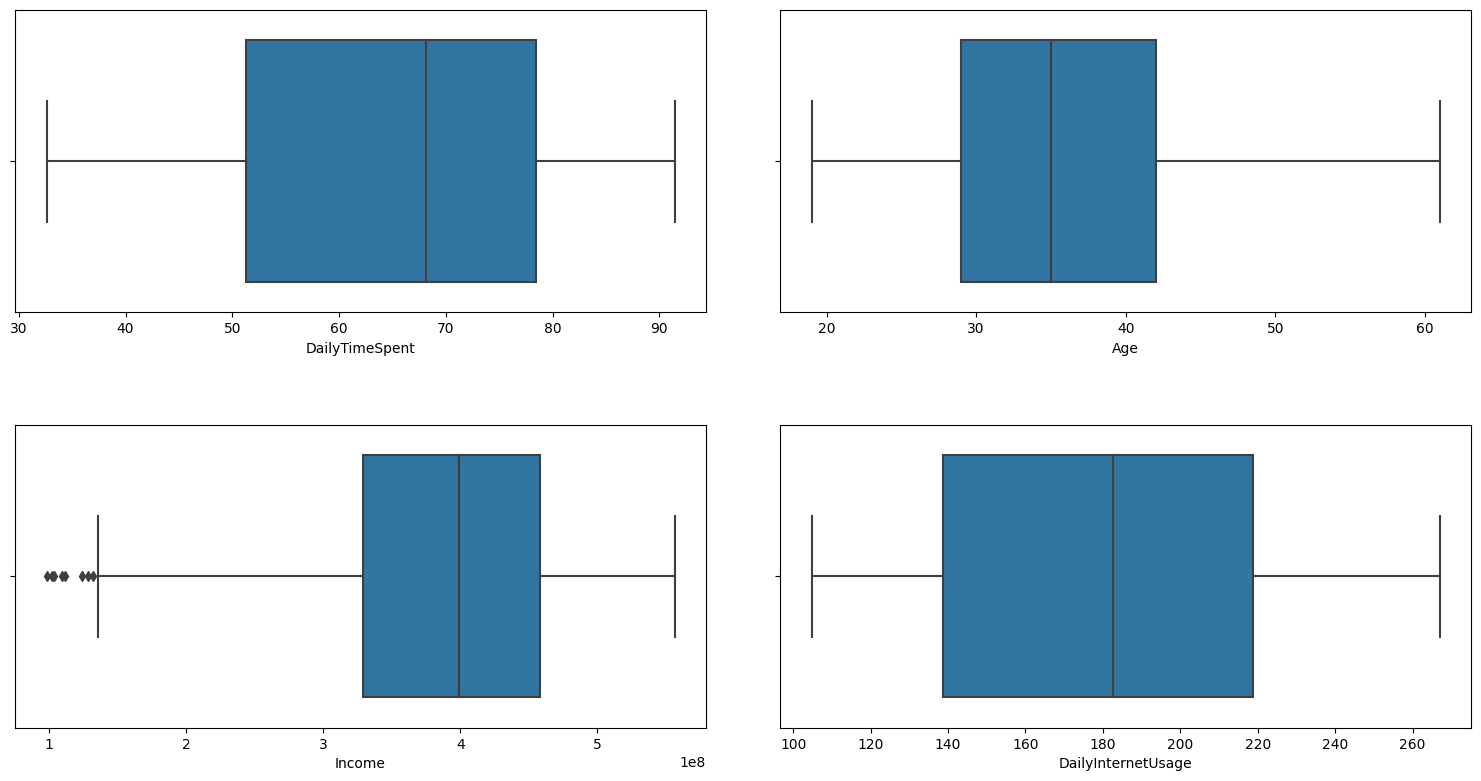

In [15]:
plt.figure(figsize=(16, 9))

for i in range(0, len(num_cols)):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df[num_cols[i]])
    plt.tight_layout(pad=5)

🔎 Insights
- Terdapat _outlier_ pada fitur `Income`, sehingga kita akan menghapus poin data tersebut agar tidak mengurangi _insight_ yang diperoleh dari analisis data.

#### Categorical Features

In [16]:
cat.describe()

,Gender,ClickedAd,City,Province,AdCategory
count,997,1000,1000,1000,1000
unique,2,2,30,16,10
top,Perempuan,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,500,64,253,112


🔽 `Gender`

In [17]:
df['Gender'].value_counts(normalize=True)

Gender
Perempuan    0.519559
Laki-Laki    0.480441
Name: proportion, dtype: float64

🔽 `ClickedAd`

In [18]:
df['ClickedAd'].value_counts(normalize=True)

ClickedAd
No     0.5
Yes    0.5
Name: proportion, dtype: float64

🔽 `City`

In [19]:
df['City'].value_counts(normalize=True)

City
Surabaya             0.064
Bandung              0.064
Jakarta Timur        0.063
Jakarta Selatan      0.061
Jakarta Barat        0.057
Bekasi               0.056
Medan                0.048
Jakarta Utara        0.045
Palembang            0.042
Semarang             0.041
Batam                0.034
Makassar             0.033
Tangerang Selatan    0.033
Tangerang            0.032
Depok                0.030
Bandar Lampung       0.029
Bogor                0.028
Jakarta Pusat        0.027
Malang               0.026
Banjarmasin          0.023
Pakanbaru            0.023
Denpasar             0.021
Padang               0.019
Balikpapan           0.018
Cimahi               0.017
Samarinda            0.016
Tasikmalaya          0.015
Pontianak            0.012
Surakarta            0.012
Serang               0.011
Name: proportion, dtype: float64

🔽 `Province`

In [20]:
df['Province'].value_counts(normalize=True)

Province
Daerah Khusus Ibukota Jakarta    0.253
Jawa Barat                       0.210
Jawa Timur                       0.090
Banten                           0.076
Jawa Tengah                      0.053
Sumatra Utara                    0.048
Sumatra Selatan                  0.042
Kepulauan Riau                   0.034
Kalimantan Timur                 0.034
Sulawesi Selatan                 0.033
Lampung                          0.029
Kalimantan Selatan               0.023
Riau                             0.023
Bali                             0.021
Sumatra Barat                    0.019
Kalimantan Barat                 0.012
Name: proportion, dtype: float64

🔽 `AdCategory`

In [21]:
df['AdCategory'].value_counts(normalize=True)

AdCategory
Otomotif      0.112
House         0.109
Health        0.104
Fashion       0.102
Food          0.099
Furniture     0.098
Travel        0.098
Electronic    0.097
Finance       0.091
Bank          0.090
Name: proportion, dtype: float64

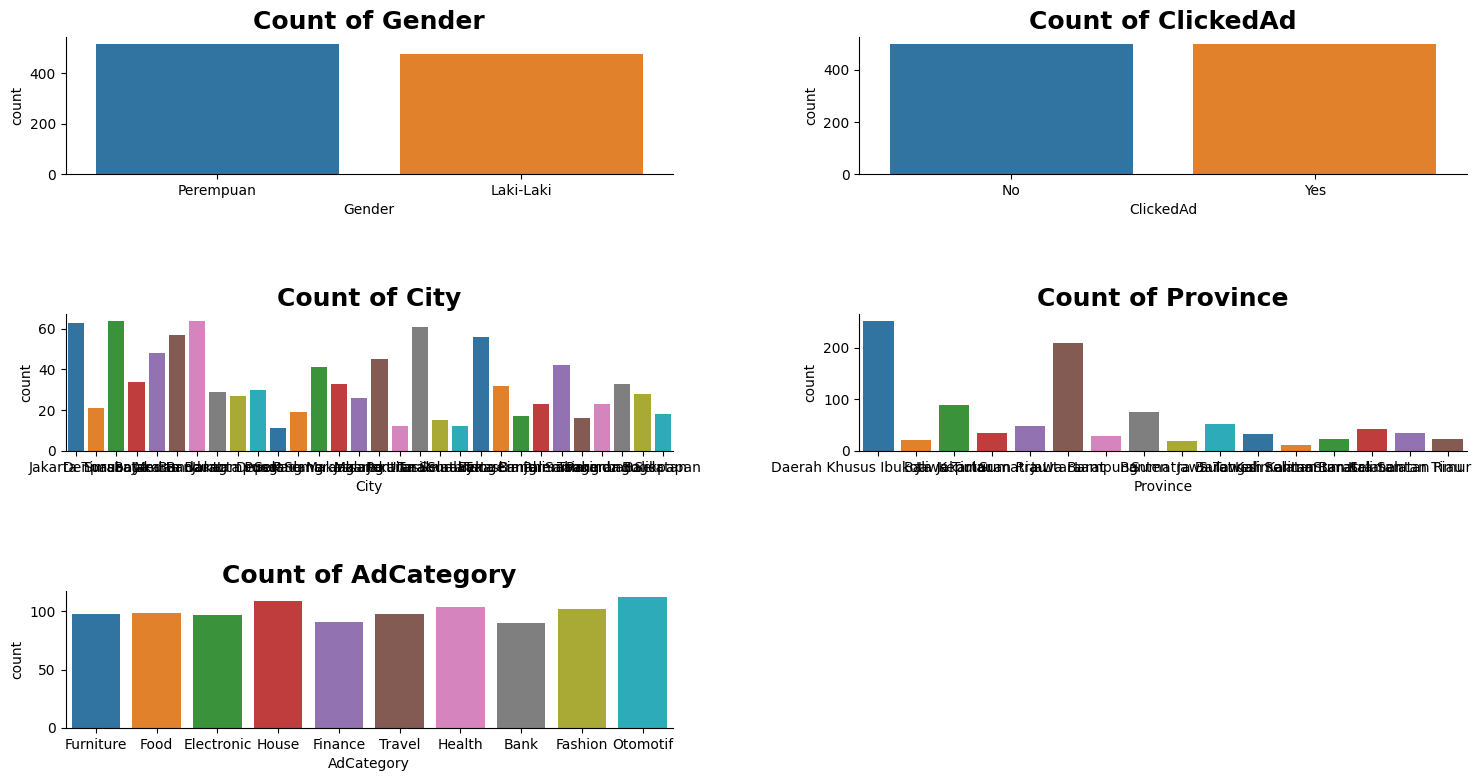

In [22]:
plt.figure(figsize=(16, 9))
for i in range(0, len(cat_cols)):
    plt.subplot(3, 2, i+1)
    ax = sns.countplot(x=df[cat_cols[i]], palette='tab10')
    plt.title(f'Count of {cat_cols[i]}', fontsize=18, weight='bold')
    sns.despine()
    plt.tight_layout(pad=5)

plt.show()

🔎 Insights
- Sebanyak 52% pelanggan adalah perempuan.
- Sebanyak 50% pelanggan mengeklik iklan di website.
- Mayoritas pelanggan berasal dari DKI Jakarta (25,3%) dan Jawa Barat (21%).
- Mayoritas pelanggan mengeklik pada kategori "Otomotif".

### Bivariate Analysis

#### `DailyTimeSpent` and `DailyInternetUsage` vs. `AgeGroup`

In [23]:
df['Age'].value_counts()

Age
31    60
36    50
28    48
29    48
33    43
35    39
30    39
34    39
32    38
26    37
38    37
37    36
40    36
27    33
41    32
45    30
39    30
25    27
42    26
43    23
44    21
24    21
50    20
23    19
46    18
49    18
48    16
52    15
47    13
22    13
51    12
53    10
54     9
55     7
20     6
21     6
57     6
19     6
60     4
58     4
56     2
59     2
61     1
Name: count, dtype: int64

🔎 Observasi
- Dari fitur `Age` akan ekstrak menjadi fitur baru, yaitu `AgeGroup` (kelompok usia).
    - <21 tahun,
    - 21-30 tahun,
    - 31-40 tahun,
    - 41-50 tahun, dan
    - \>50 tahun.

In [24]:
# Age group
df['AgeGroup'] = df['Age'].apply(lambda x: '< 21' if x < 21 else (
                                           '21-30' if x < 31 else (
                                           '31-40' if x < 41 else (
                                           '41-50' if x < 51 else (
                                           '> 50')))))
df['AgeGroup'].value_counts()

AgeGroup
31-40    408
21-30    291
41-50    217
> 50      72
< 21      12
Name: count, dtype: int64

In [25]:
# Daily Time Spent
dts = df.groupby('AgeGroup')['DailyTimeSpent'].mean().round(2).reset_index()

# Daily Internet Usage
diu = df.groupby('AgeGroup')['DailyInternetUsage'].mean().round(2).reset_index()

In [26]:
dts

,AgeGroup,DailyTimeSpent
0,21-30,69.97
1,31-40,67.23
2,41-50,56.92
3,< 21,63.84
4,> 50,55.89


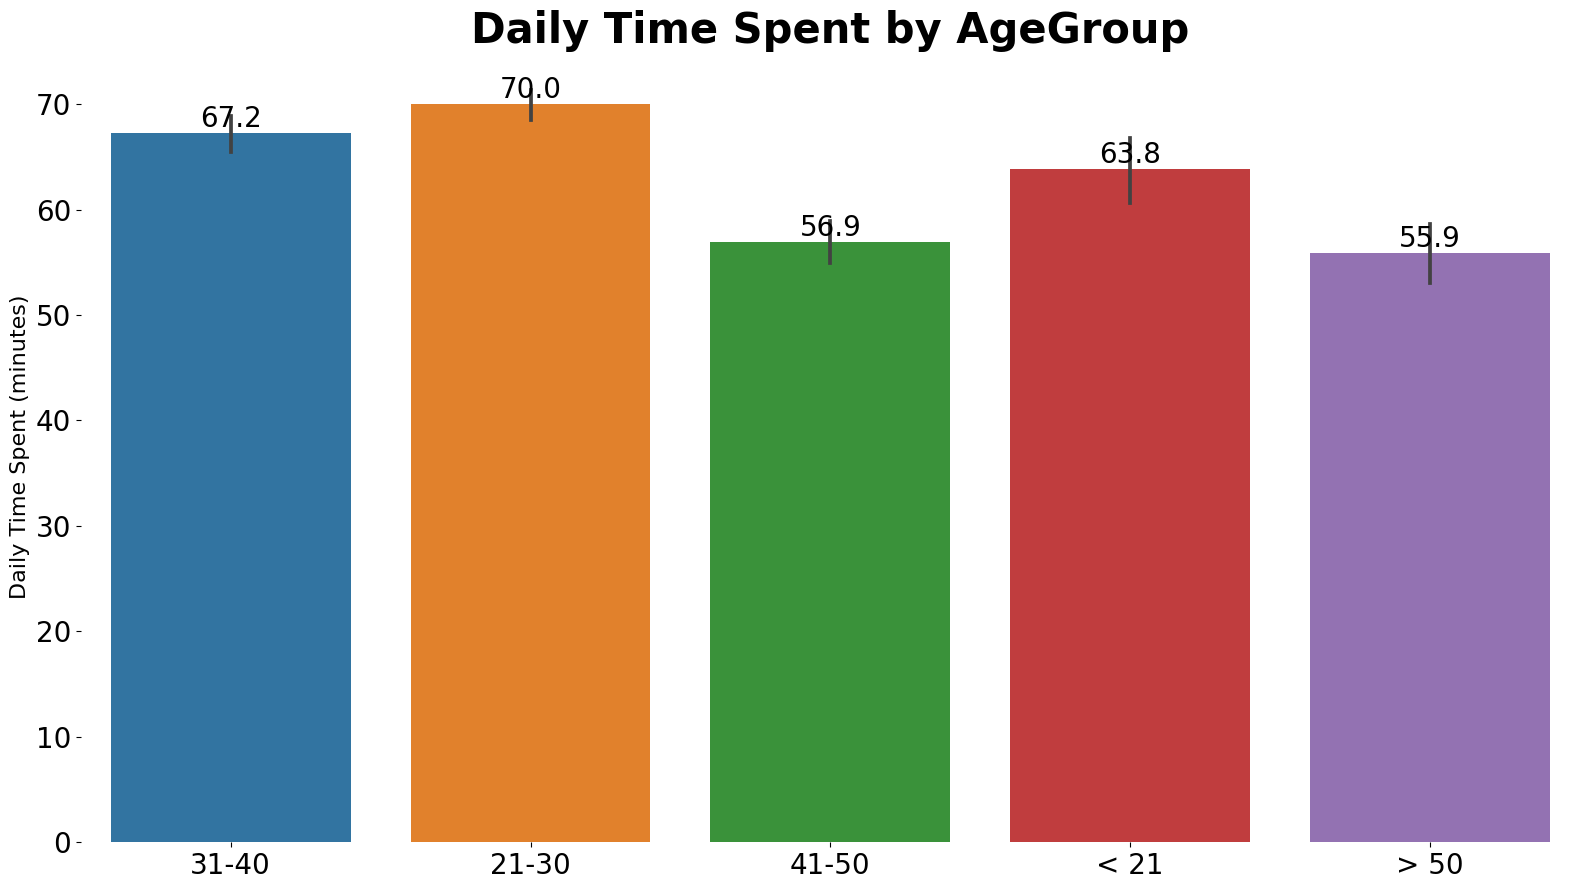

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 9)
ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)

ax = sns.barplot(x='AgeGroup',
                 y='DailyTimeSpent',
                 data=df, palette='tab10')

plt.title('Daily Time Spent by AgeGroup', weight='bold', fontsize=30)
plt.bar_label(ax.containers[0], fmt='%.1f', fontsize=20)
plt.xlabel('')
plt.ylabel('Daily Time Spent (minutes)', fontsize=16)
plt.tick_params(axis='both', labelsize=20)
plt.tight_layout()
plt.show()

In [28]:
diu

,AgeGroup,DailyInternetUsage
0,21-30,195.72
1,31-40,186.25
2,41-50,153.75
3,< 21,191.41
4,> 50,156.98


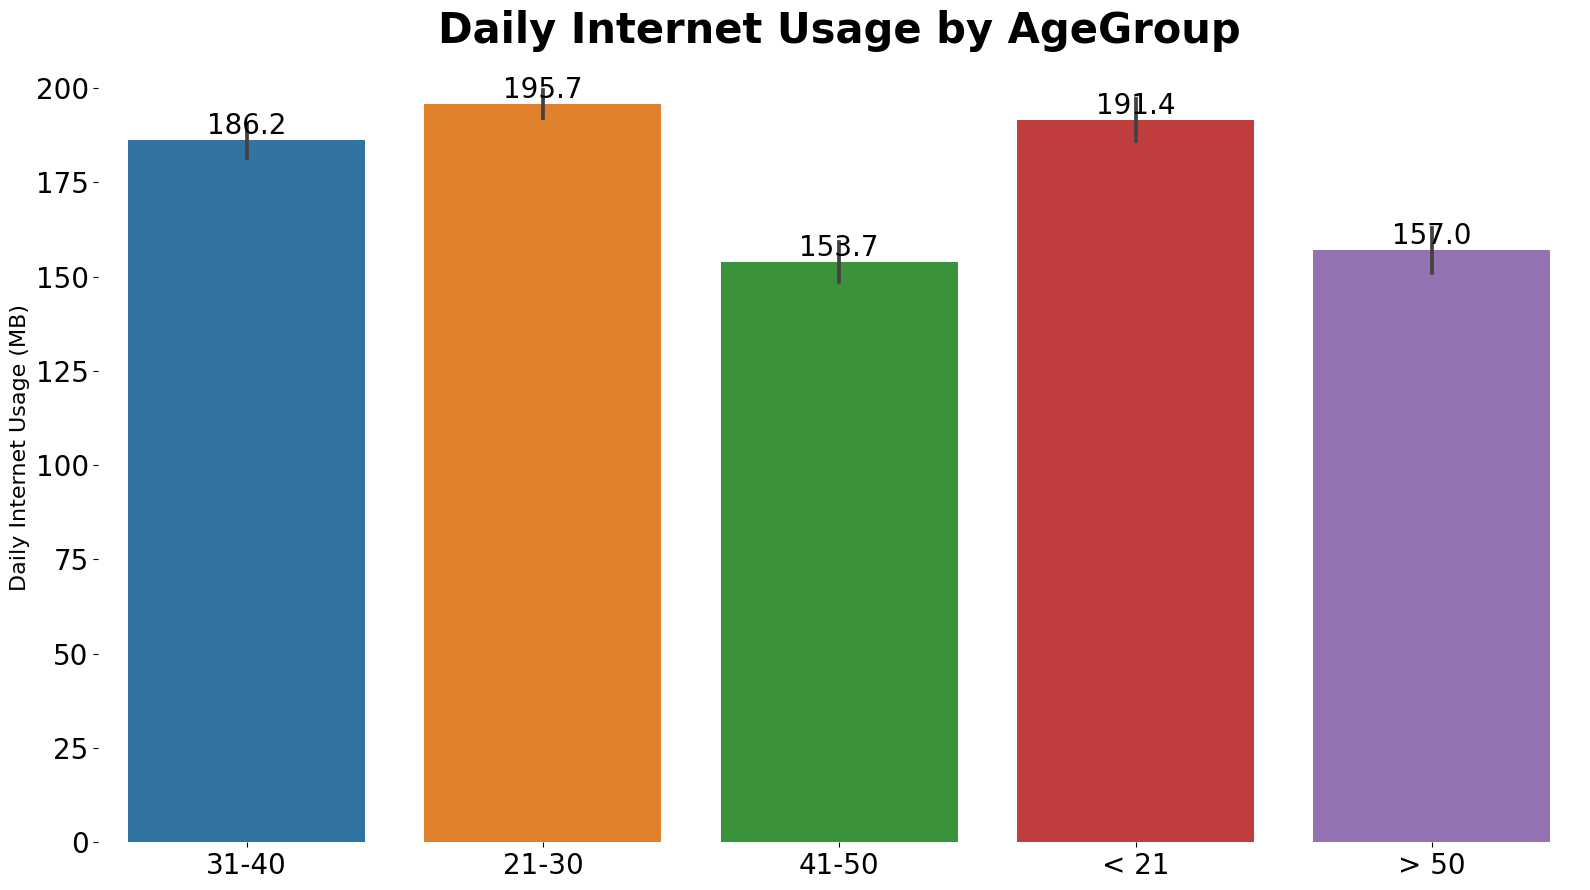

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 9)
ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)

ax = sns.barplot(x='AgeGroup',
                 y='DailyInternetUsage',
                 data=df, palette='tab10')

plt.title('Daily Internet Usage by AgeGroup', weight='bold', fontsize=30)
plt.bar_label(ax.containers[0], fmt='%.1f', fontsize=20)
plt.xlabel('')
plt.ylabel('Daily Internet Usage (MB)', fontsize=16)
plt.tick_params(axis='both', labelsize=20)
plt.tight_layout()
plt.show()

#### `ClickedAd` vs. `DailyTimeSpent`, `DailyInternetUsage`, and `Age`

In [30]:
# variable = ['DailyTimeSpent', 'DailyInternetUsage', 'Age']

# plt.figure(figsize=(16, 9))
# for var in range(0, len(variable)):
#     plt.subplot(1, 3, var+1)
#     sns.regplot(x=df[variable[var]], y='ClickedAd', data=df, scatter_kws={'s':20, 'alpha':0.3}, 
#                 line_kws={'color':'tab:orange'}).set(title=f'Regression plot of {variable[var]} and Conversion Rate')
#     sns.despine()
#     plt.tight_layout(pad=5)

🔎 Insights
- XXX

#### `DailyTimeSpent` and `DailyInternetUsage` vs. `Age`

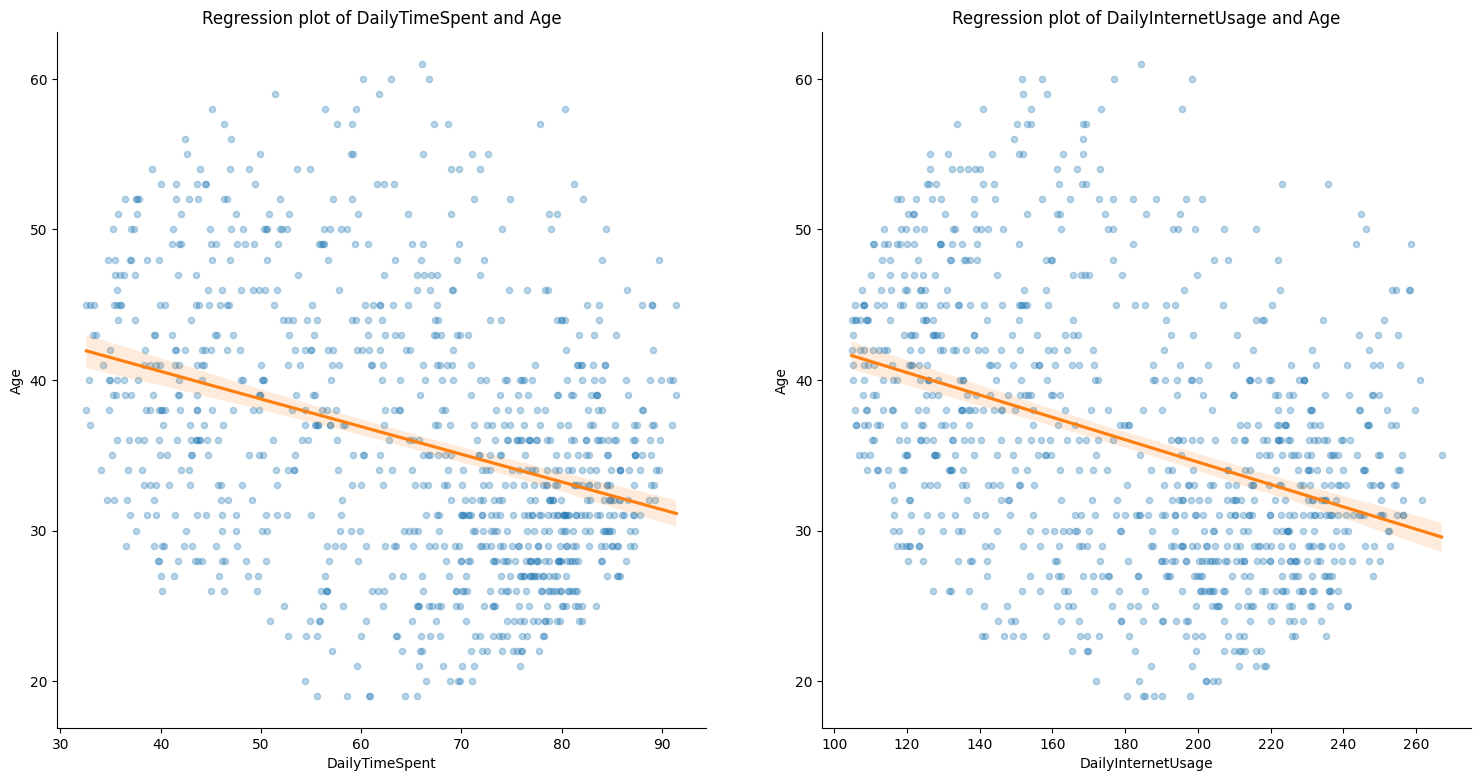

In [31]:
variable = ['DailyTimeSpent', 'DailyInternetUsage']

plt.figure(figsize=(16, 9))
for var in range(0, len(variable)):
    plt.subplot(1, 2, var+1)
    sns.regplot(x=df[variable[var]], y='Age', data=df, scatter_kws={'s':20, 'alpha':0.3}, 
                line_kws={'color':'tab:orange'}).set(title=f'Regression plot of {variable[var]} and Age')
    sns.despine()
    plt.tight_layout(pad=5)

🔎 Insights
- Terdapat korelasi negatif yang kuat antara `Age` dan `DailyTimeSpent` ataupun `DailyInternetUsage`.

#### `DailyTimeSpent` vs. `DailyInternetUsage`

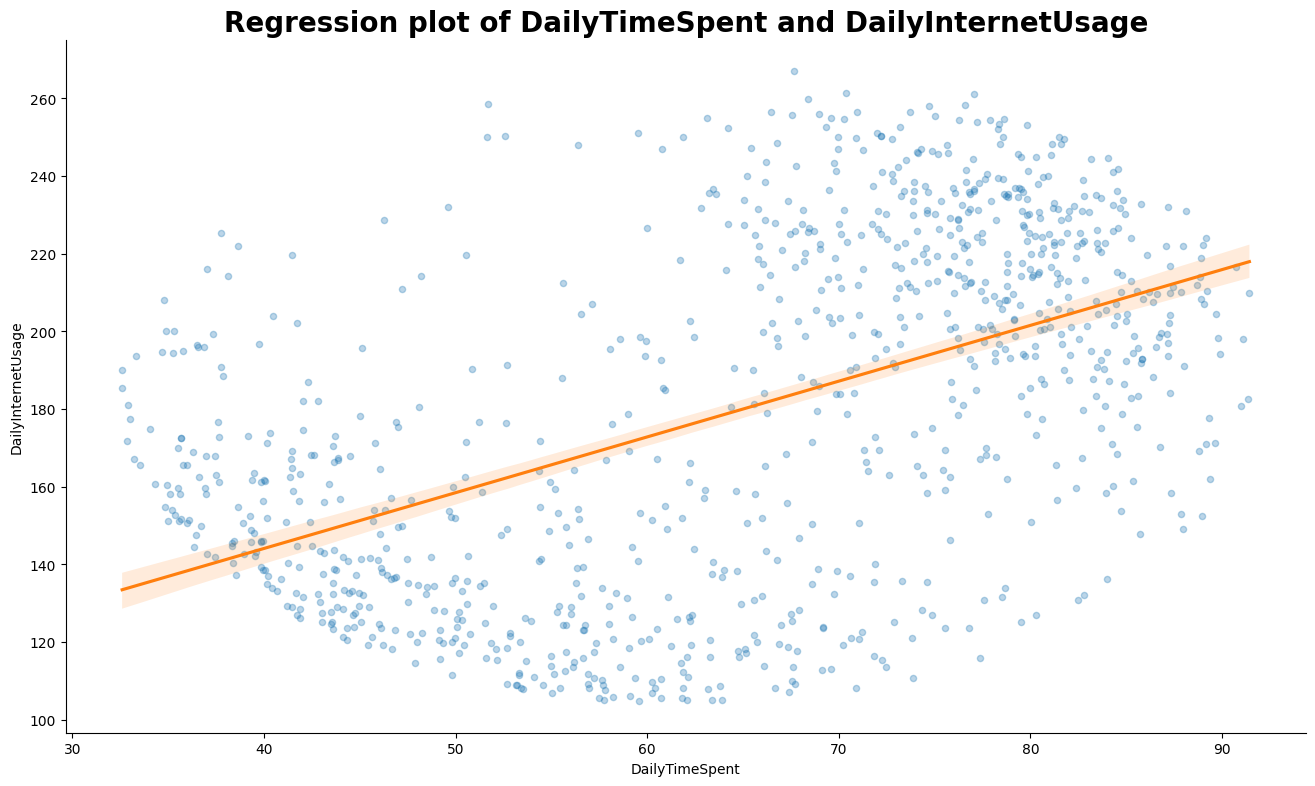

In [32]:
plt.figure(figsize=(16, 9))
sns.regplot(x='DailyTimeSpent', y='DailyInternetUsage', data=df, scatter_kws={'s':20, 'alpha':0.3},
            line_kws={'color':'tab:orange'})
sns.despine()

plt.title('Regression plot of DailyTimeSpent and DailyInternetUsage', weight='bold', fontsize=20)
plt.show()

🔎 Insights
- Terdapat korelasi positif yang kuat antara `DailyTimeSpent` dan `DailyInternetUsage`.
- Makin tinggi `DailyTimeSpent` seseorang, makin besar jumlah internet (dalam MB) yang digunakan.

### Correlation Matrix

In [33]:
num_cols

Index(['DailyTimeSpent', 'Age', 'Income', 'DailyInternetUsage'], dtype='object')

In [34]:
features = ['Age', 'Income', 'DailyTimeSpent', 'DailyInternetUsage']

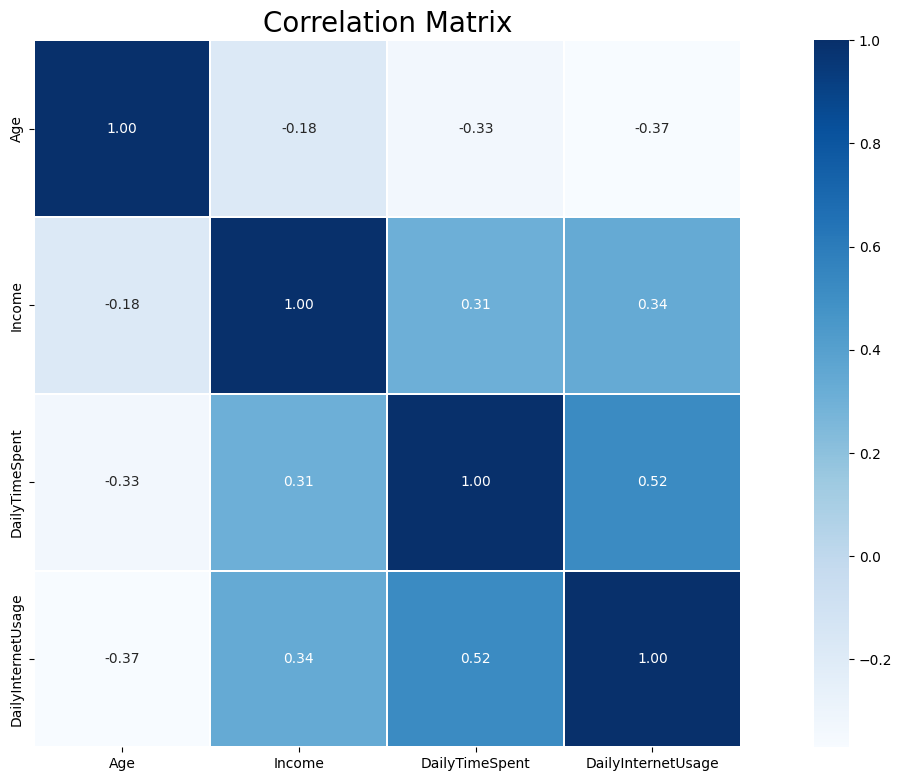

In [35]:
# Correlation plot
plt.figure(figsize=(16, 9))
corrmat = df[features].corr()
sns.heatmap(corrmat, cmap='Blues', annot=True, fmt='.2f', vmin=corrmat.values.min(), vmax=1, square=True, linewidths=0.1, annot_kws={'fontsize':10})
plt.title('Correlation Matrix', fontsize=20)
plt.tight_layout(pad=5)
plt.show()

🔎 Insights
- Fitur `Income`, `DailyTimeSpent`, dan `DailyInternetUsage` berkorelasi negatif terhadap `Age`.

### Multivariate Analysis

In [36]:
features = ['Income', 'DailyTimeSpent', 'DailyInternetUsage']

In [37]:
# sns.pairplot(df[features], hue='', palette='tab10')
# plt.show()

🔎 Insights
- XXX

## Data Cleaning

### Detect Missing Values

In [38]:
# Check the features that have missing values
print(df.isna().values.any())

# Summarize missing value
total = df.isna().sum().sort_values(ascending=False)
percent = round(df.isna().mean() * 100, 2).sort_values(ascending=False)

na = pd.concat([total, percent], axis=1, keys=['Total', 'Percentage (%)'])
na = na[na['Total'] > 0]
na.reset_index(inplace=True)
na.rename(columns={'index': 'Feature Name'}, inplace=True)
na

True


,Feature Name,Total,Percentage (%)
0,DailyTimeSpent,13,1.3
1,Income,13,1.3
2,DailyInternetUsage,11,1.1
3,Gender,3,0.3


🔎 Observasi
- Terdapat _missing values_ pada beberapa fitur, seperti `Gender`, `Income`, `DailyTimeSpent`, dan `DailyInternetUsage`, yang jumlahnya kurang dari 2% dan kita akan mengganti nilai-nilai tersebut dengan median.

In [39]:
# Drop missing values
df.dropna(subset=['Gender'], inplace=True)

# Fill missing values with median
df['Income'].fillna(df['Income'].median(), inplace=True)
df['DailyTimeSpent'].fillna(df['DailyTimeSpent'].median(), inplace=True)
df['DailyInternetUsage'].fillna(df['DailyInternetUsage'].median(), inplace=True)

# Recheck
df.isna().sum().sum()

0

✅ Dataset sudah bersih dari _missing values_.

### Detect Duplicate Values

In [40]:
# Check the features that have duplicate values
print(df.duplicated().any())
df.duplicated().sum()

False


0

✅ Dataset bebas dari _duplicate values_.

### Number of Unique Classes

In [41]:
# Count number of unique class
df.nunique().sort_values(ascending=False)

Timestamp             994
Income                985
DailyInternetUsage    952
DailyTimeSpent        889
Age                    43
City                   30
Province               16
AdCategory             10
AgeGroup                5
Gender                  2
ClickedAd               2
dtype: int64

In [42]:
values = {'Feature Name': [], 'Unique Classes': []}
for col in df.columns:
    values['Feature Name'].append(col)
    values['Unique Classes'].append(df[col].unique())
    
unique = pd.DataFrame(values)
unique

,Feature Name,Unique Classes
0,DailyTimeSpent,"[68.95, 80.23, 69.47, 74.15, 68.37, 59.99, 88...."
1,Age,"[35, 31, 26, 29, 23, 33, 48, 30, 20, 49, 37, 2..."
2,Income,"[432837300.0, 479092950.00000006, 418501580.0,..."
3,DailyInternetUsage,"[256.09, 193.77, 236.5, 245.89, 225.58, 226.74..."
4,Gender,"[Perempuan, Laki-Laki]"
5,Timestamp,"[2016-03-27 00:53:00, 2016-04-04 01:39:00, 201..."
6,ClickedAd,"[No, Yes]"
7,City,"[Jakarta Timur, Denpasar, Surabaya, Batam, Med..."
8,Province,"[Daerah Khusus Ibukota Jakarta, Bali, Jawa Tim..."
9,AdCategory,"[Furniture, Food, Electronic, House, Finance, ..."


🔽 `AdCategory`

In [43]:
df['AdCategory'].value_counts(normalize=True)

AdCategory
Otomotif      0.111334
House         0.108325
Health        0.104313
Fashion       0.102307
Food          0.099298
Furniture     0.098295
Travel        0.098295
Electronic    0.096289
Finance       0.091274
Bank          0.090271
Name: proportion, dtype: float64

🔎 Observasi
- Pada fitur `AdCategory` perlu dilakukan _regrouping_ atau _renaming_, seperti:
    - `House` dan `Furniture` → `Rumah Tangga`,
    - `Travel`, `Fashion`, `Food`, dan `Health` → `Gaya Hidup`,
    - `Finance` dan `Bank` → `Jasa Keuangan`,
    - `Electronic` → `Elektronik`.

In [44]:
# Fix incorrect values
df['AdCategory'] = df['AdCategory'].replace({
    'House'      : 'Rumah Tangga',
    'Furniture'  : 'Rumah Tangga',
    'Travel'     : 'Gaya Hidup',
    'Fashion'    : 'Gaya Hidup',
    'Food'       : 'Gaya Hidup',
    'Health'     : 'Gaya Hidup',
    'Finance'    : 'Jasa Keuangan',
    'Bank'       : 'Jasa Keuangan',
    'Electronic' : 'Elektronik'
})
df['AdCategory'].value_counts()

AdCategory
Gaya Hidup       403
Rumah Tangga     206
Jasa Keuangan    181
Otomotif         111
Elektronik        96
Name: count, dtype: int64